# Linear Regression Model

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #create constants
from sklearn import linear_model #model
from sklearn.model_selection import RandomizedSearchCV #hyperparameter tuning
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.decomposition import PCA


In [11]:
#read in, index_col=0 to stop Unnamed: 0 column from populating
train = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/clean_train.csv',index_col=[0])
test = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/clean_test.csv',index_col=[0])


In [38]:
X = train.drop(columns='Listening_Time_minutes')
y =train['Listening_Time_minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)# Plot the splitting results
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = metrics.root_mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Root Mean Squared Error: 13.37
R² Score: 0.7566


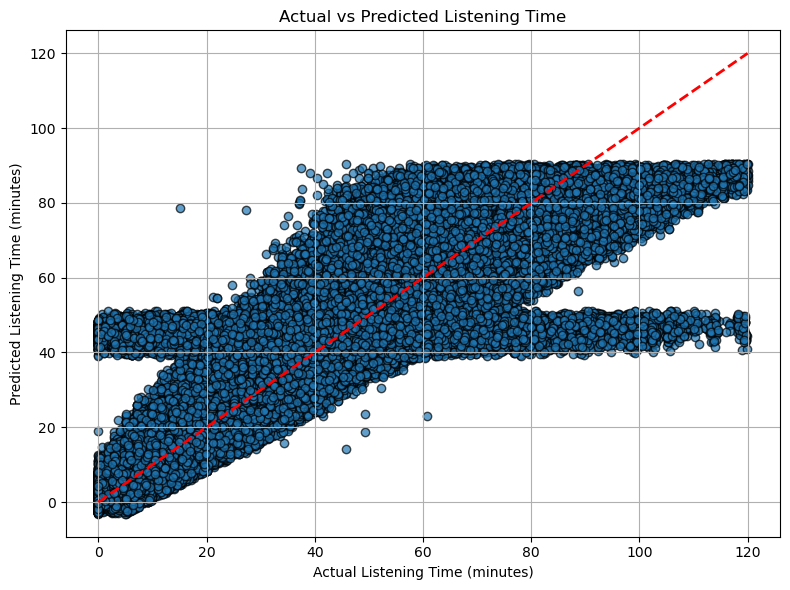

In [28]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Listening Time (minutes)')
plt.ylabel('Predicted Listening Time (minutes)')
plt.title('Actual vs Predicted Listening Time')
plt.grid(True)
plt.tight_layout()
plt.show()

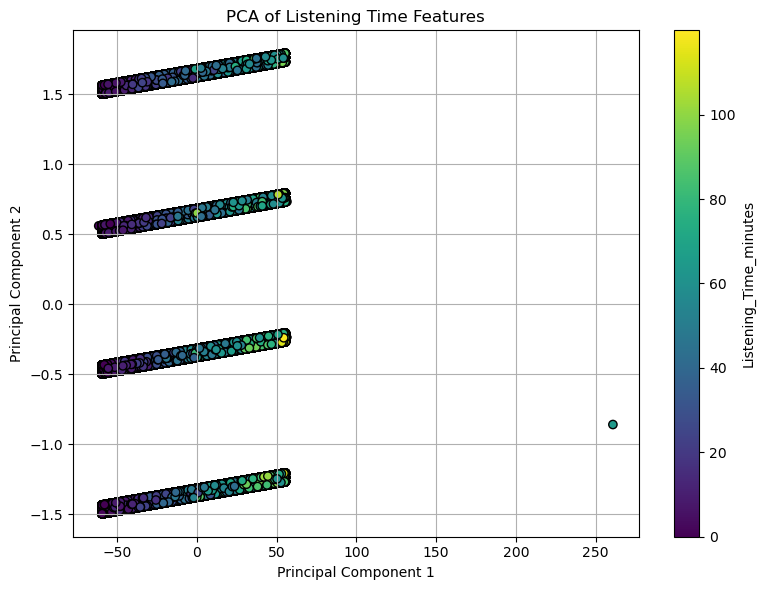

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plot the PCA-transformed data, colored by target
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Listening_Time_minutes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Listening Time Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.25, random_state = 123)
# Train Linear Regression on PCA-transformed features
pca_model = linear_model.LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)

# Predict and evaluate
pca_predictions = pca_model.predict(X_test_pca)
pca_rmse = metrics.root_mean_squared_error(y_test_pca, pca_predictions)
pca_r2 = metrics.r2_score(y_test_pca, pca_predictions)
print(f"Root Mean Squared Error: {pca_rmse:.2f}")
print(f"R² Score: {pca_r2:.4f}")

Root Mean Squared Error: 13.38
R² Score: 0.7565


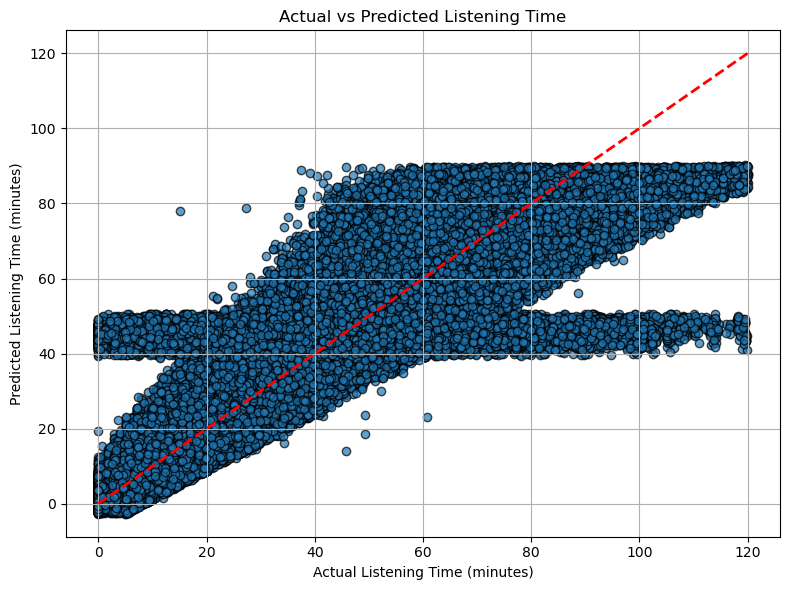

In [37]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, pca_predictions, edgecolor='k', alpha=0.7)
plt.plot([y_test_pca.min(), y_test_pca.max()], [y_test_pca.min(), y_test_pca.max()], 'r--', lw=2)
plt.xlabel('Actual Listening Time (minutes)')
plt.ylabel('Predicted Listening Time (minutes)')
plt.title('Actual vs Predicted Listening Time')
plt.grid(True)
plt.tight_layout()
plt.show()

Marginally worse results using PCA. Turns out reducing 3 dimensions to 2 doesn't do all that much. But it was worth a shot.

## Conclusion

Our best Linear Regression model is our "model" variable.

#### model 

RMSE = 13.37

R² Score = .76